# Task 1: Perform an Exploratory Data Analysis on a Given Dataset (5 marks)
Exploratory Data Analysis (EDA) is an approach that is used to analyse the data and
discover trends, and patterns, or check assumptions in data with the help of statistical
summaries and graphical representations.
You may make use of Python libraries and visualisation libraries to assess the
relationship (correlation, distribution etc) among the variables.

In [3]:
import pandas as pd

df=pd.read_csv('data/01_hdb_resale_transactions.csv')
df.head()

block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist  min_dist_mrt  
0      255000.0  1.375097  103.837619  10296.855750   1096.947897  
1      275000.0  1.373922  103.855621  10065.227930    847.235690  
2      285000.0  1.373552  103.838169  10118.831550   1176.742184  
3      290000.0  1.367761  103.855357   9383.300907    682.205473  
4      290000.0  1.371626  103.857736   9825.917255    953.047695

In [4]:
df.shape

(194240, 15)

In [5]:
import pandas_profiling as pp
pp.ProfileReport(df)

C:\Users\ulyss\anaconda3\envs\mlops\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\ulyss\anaconda3\envs\mlops\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\ulyss\AppData\Local\Temp\ipykernel_5060\2725490056.py:1: DeprecationWarning: `import pandas_profiling` is going to be 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Checking for null values and duplicates

In [6]:
#identify number of null vallues for every columns
df.isnull().sum()

block                  0
street_name            0
town                   0
postal_code            0
month                  0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
latitude               0
longitude              0
cbd_dist               0
min_dist_mrt           0
dtype: int64

In [7]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Records:")
duplicate_rows

Duplicate Records:


block                street_name             town  postal_code  \
661       57              GEYLANG BAHRU  KALLANG/WHAMPOA       330057   
2214     403         TAMPINES STREET 41         TAMPINES       520403   
4525     701       BEDOK RESERVOIR ROAD            BEDOK       470701   
4721     714     CLEMENTI WEST STREET 2         CLEMENTI       120714   
5978     501      JURONG WEST STREET 51      JURONG WEST       640501   
...      ...                        ...              ...          ...   
187622    28            MARSILING DRIVE        WOODLANDS       730028   
189218  449B  BUKIT BATOK WEST AVENUE 9      BUKIT BATOK       652449   
190170     7            MARSILING DRIVE        WOODLANDS       730007   
191859    92       BEDOK NORTH AVENUE 4            BEDOK       460092   
193190  121B            CANBERRA STREET        SEMBAWANG       752121   

          month flat_type storey_range  floor_area_sqm      flat_model  \
661     2015-01    3 ROOM     16 TO 18            65.0        Improved   
2214    2015-02    3 ROOM     07 TO 09            69.0        Improved   
4525    2015-04    4 ROOM     10 TO 12            93.0  New Generation   
4721    2015-04    3 ROOM     10 TO 12            67.0  New Generation   
5978    2015-05    3 ROOM     01 TO 03            74.0         Model A   
...         ...       ...          ...             ...             ...   
187622  2023-04    4 ROOM     07 TO 09            97.0  New Generation   
189218  2023-04    4 ROOM     07 TO 09            93.0         Model A   
190170  2023-05    4 ROOM     04 TO 06            88.0        Improved   
191859  2023-06    3 ROOM     01 TO 03            67.0  New Generation   
193190  2023-06    5 ROOM     04 TO 06           113.0        Improved   

        lease_commence_date  resale_price  latitude   longitude      cbd_dist  \
661                    1974      315000.0  1.323538  103.869148   4902.838268   
2214                   1985      350000.0  1.357512  103.944918  13282.819870   
4525                   1980      400000.0  1.337642  103.918906   9649.619130   
4721                   1980      300000.0  1.304303  103.761682  10248.099530   
5978                   1986      304000.0  1.350384  103.719026  16499.121950   
...                     ...           ...       ...         ...           ...   
187622                 1977      395000.0  1.442791  103.773707  19666.119160   
189218                 2019      620000.0  1.351979  103.741081  14444.299170   
190170                 1976      360000.0  1.441669  103.776733  19408.341790   
191859                 1979      350000.0  1.332444  103.941298  11410.965630   
193190                 2018      680000.0  1.447886  103.834034  18333.260140   

        min_dist_mrt  
661       370.175159  
2214     1091.148857  
4525      336.825664  
4721     1257.801143  
5978      710.298975  
...              ...  
187622   1136.324402  
189218    987.033105  
190170   1053.916129  
191859    806.929986  
193190    717.741864  

[363 rows x 15 columns]

### Remove duplicates

In [8]:
df=df.drop_duplicates()
df.shape

(193877, 15)

# Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

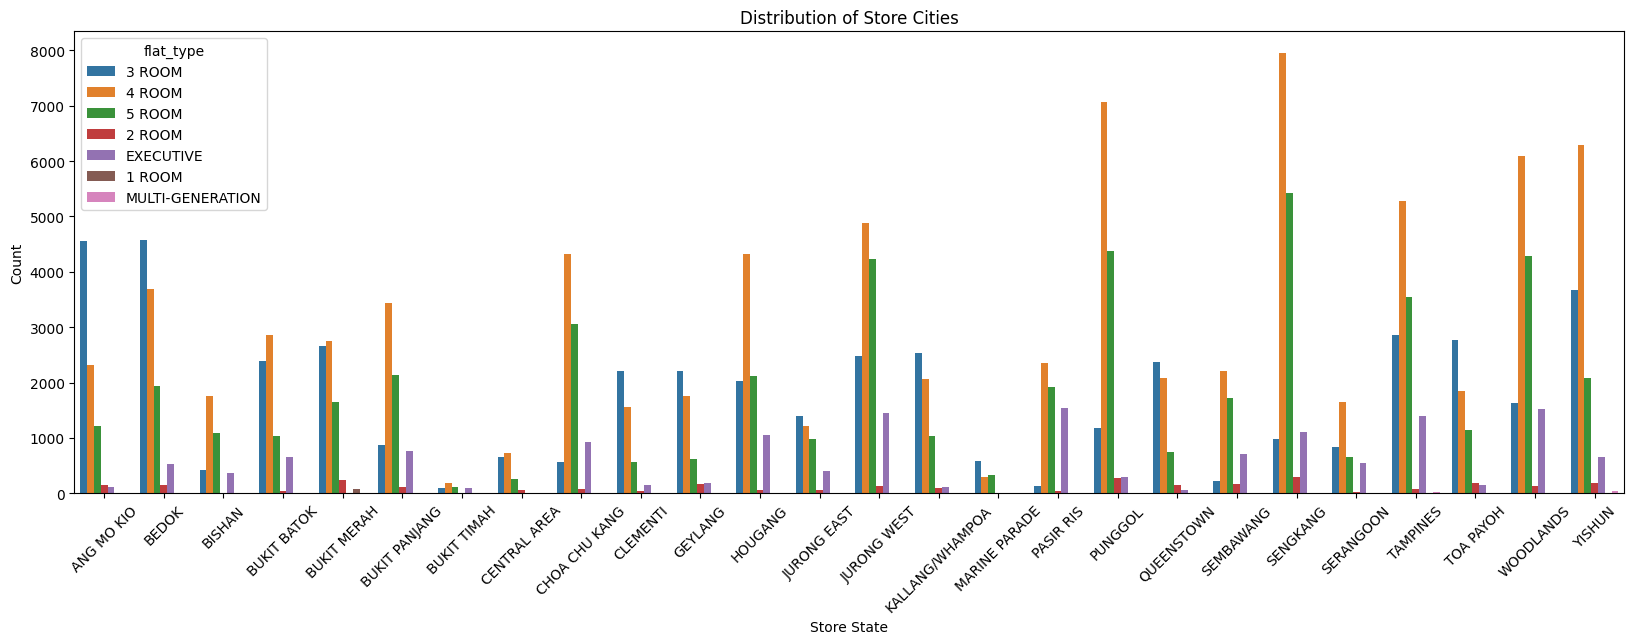

In [10]:
plt.figure(figsize=(20, 6))
sns.countplot(x='town', data=df, hue='flat_type')
plt.xlabel('Store State')
plt.ylabel('Count')
plt.title('Distribution of Store Cities')
plt.xticks(rotation=45)

plt.show()

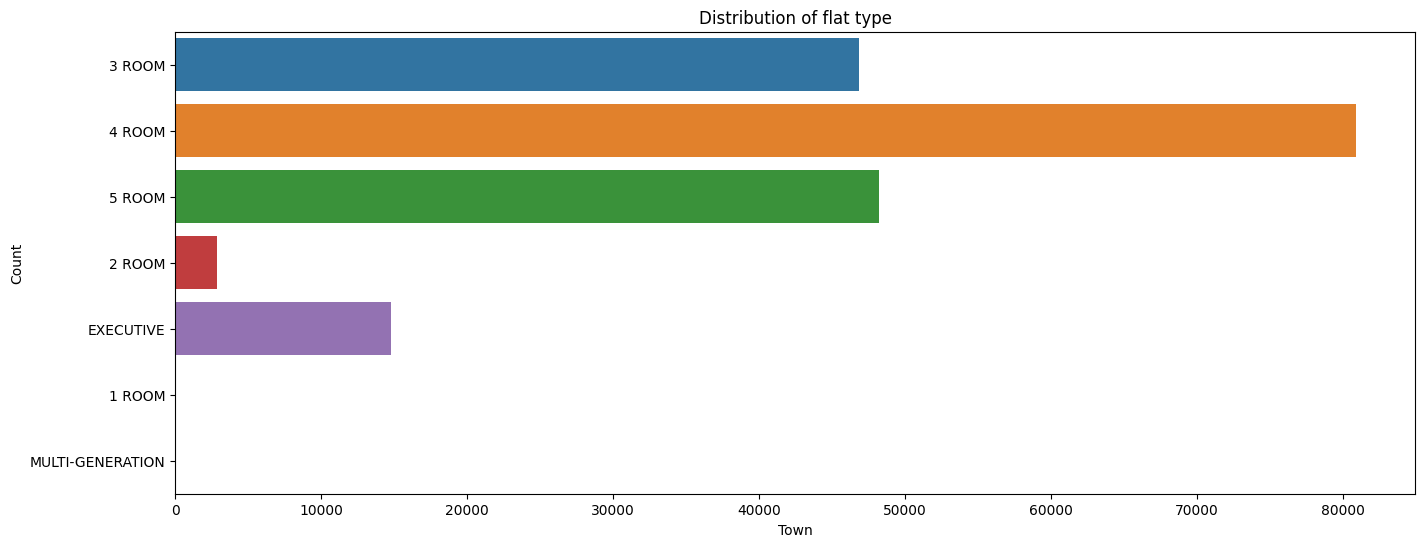

In [11]:
# the different cities the stores are in
plt.figure(figsize=(16, 6))
sns.countplot(y='flat_type', data=df)
plt.xlabel('Town')
plt.ylabel('Count')
plt.title('Distribution of flat type')

plt.show()

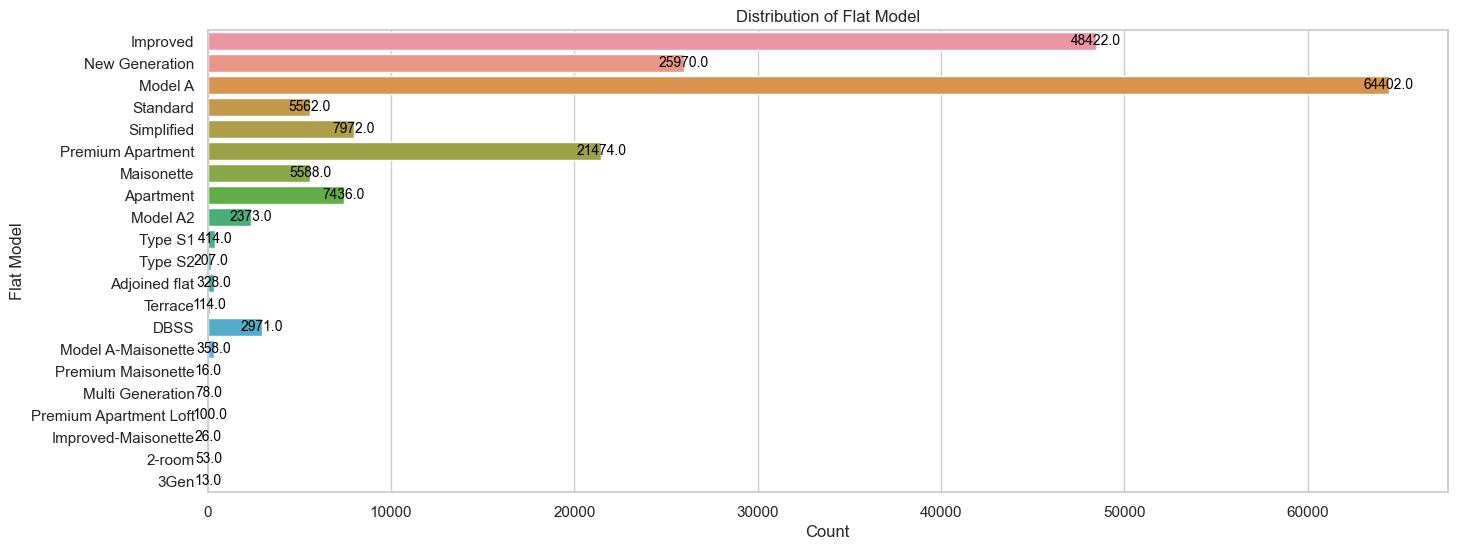

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Assuming you have a DataFrame 'df' and want to plot the distribution of 'flat_model'
plt.figure(figsize=(16, 6))
ax = sns.countplot(y='flat_model', data=df)
plt.xlabel('Count')
plt.ylabel('Flat Model')
plt.title('Distribution of Flat Model')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.show()


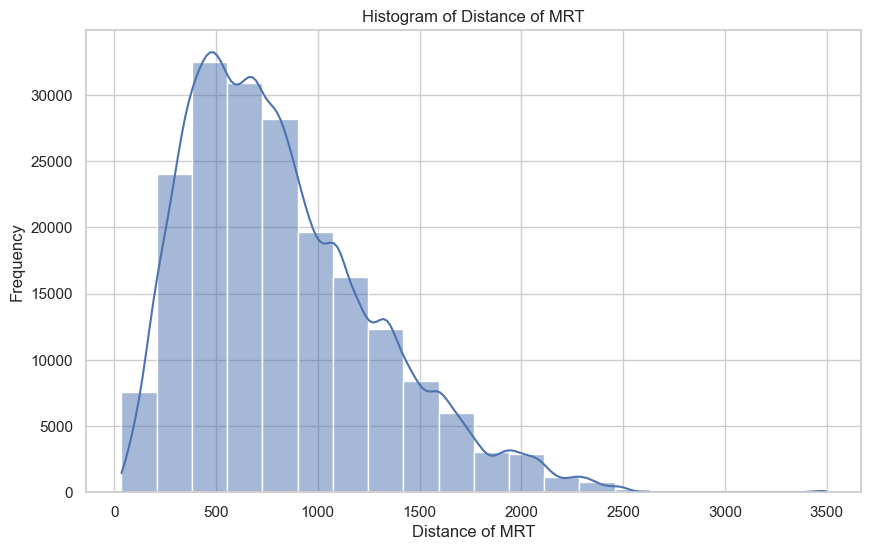

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='min_dist_mrt', bins=20, kde=True)
plt.xlabel('Distance of MRT')
plt.ylabel('Frequency')
plt.title('Histogram of Distance of MRT')

plt.show()


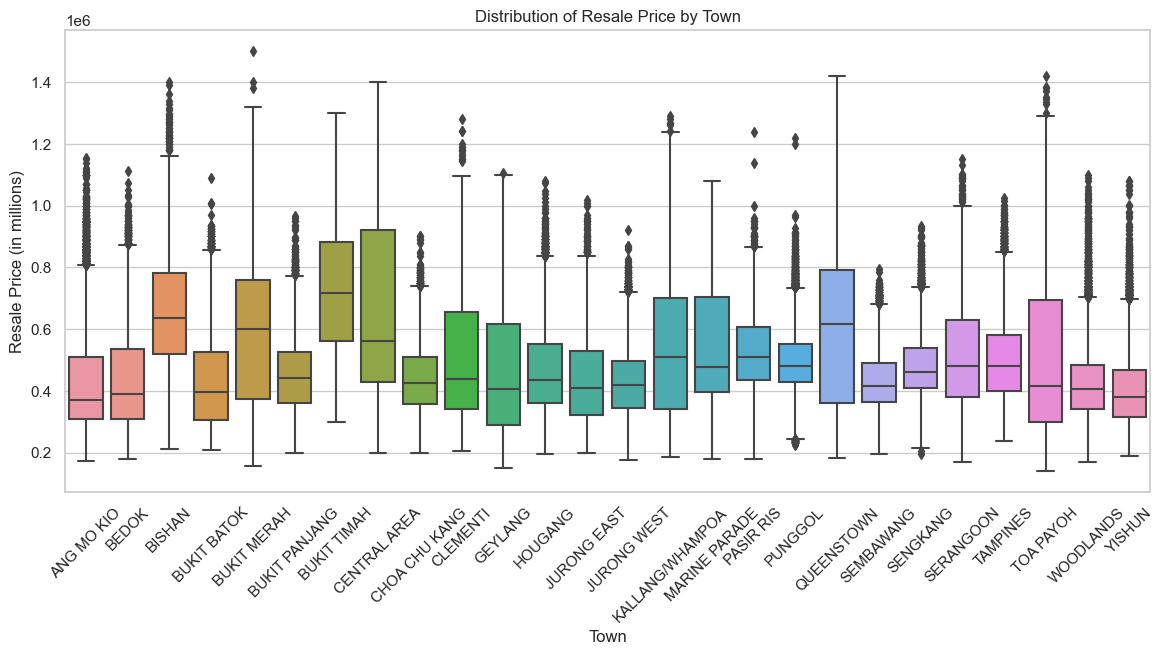

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='town', y='resale_price', data=df)
plt.xlabel('Town')
plt.ylabel('Resale Price (in millions)')
plt.title('Distribution of Resale Price by Town')

plt.xticks(rotation=45)

plt.show()

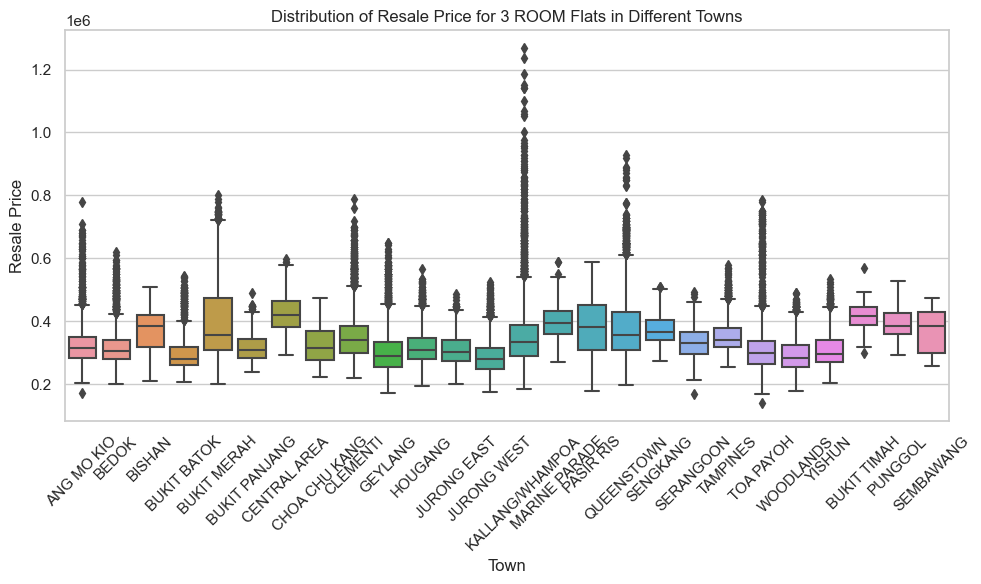

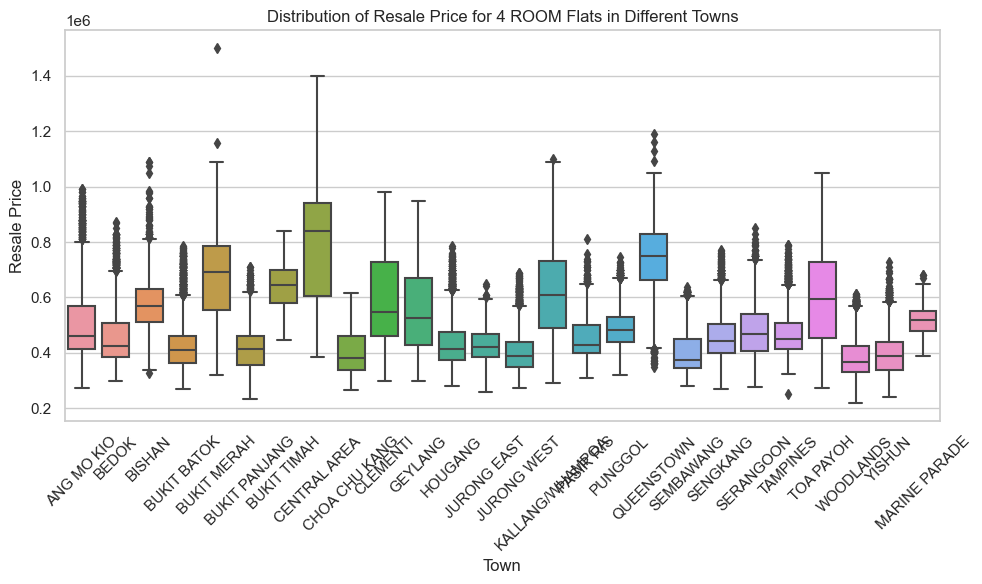

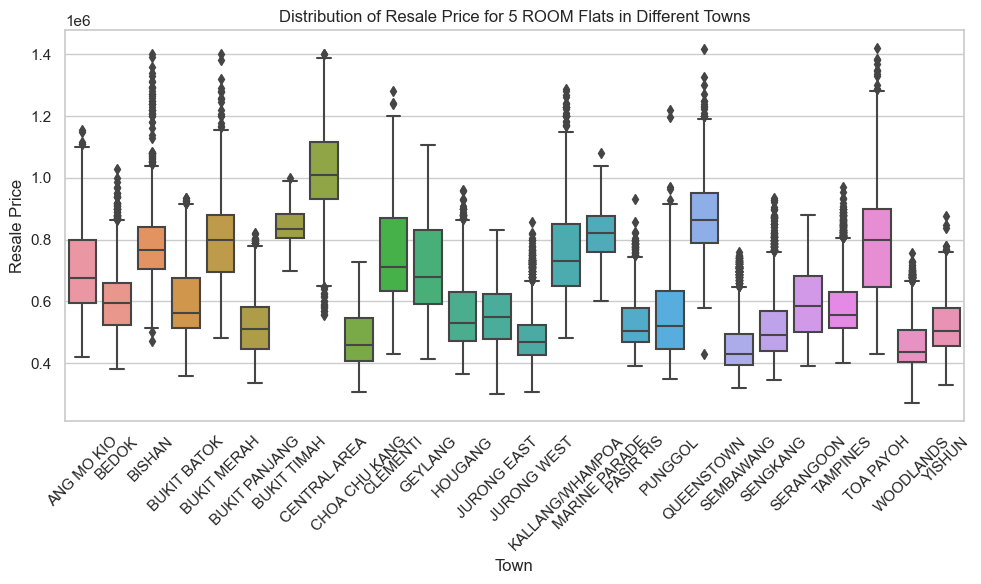

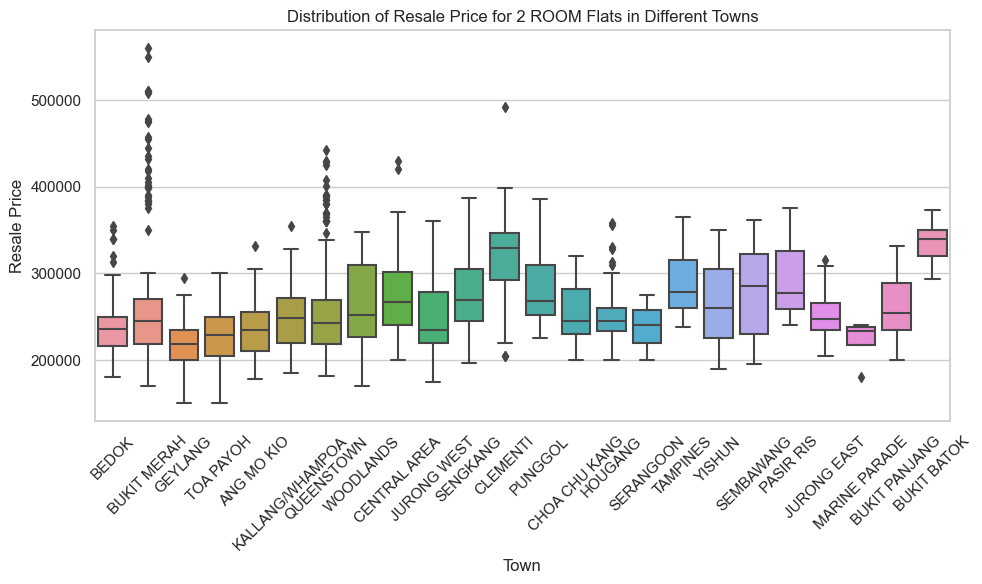

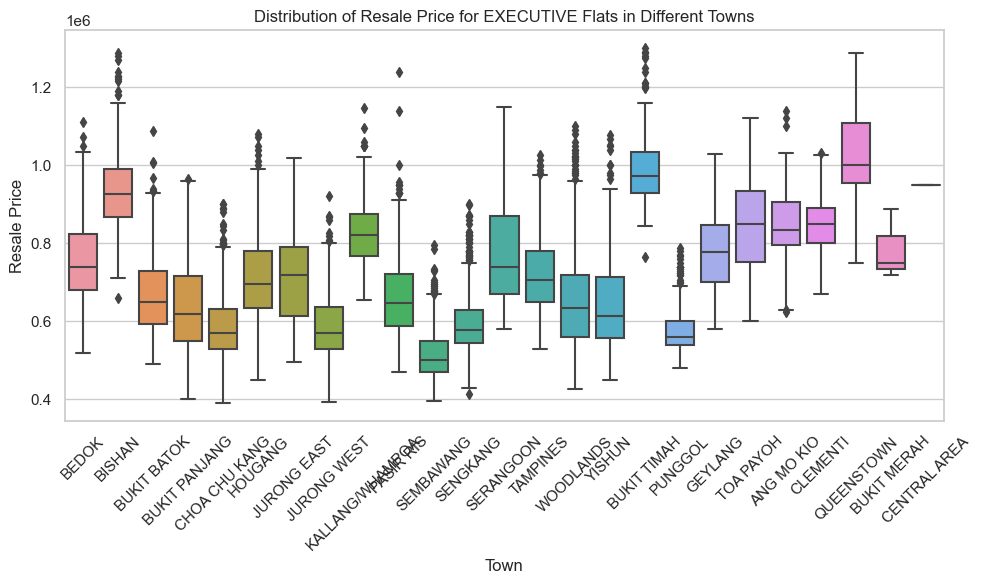

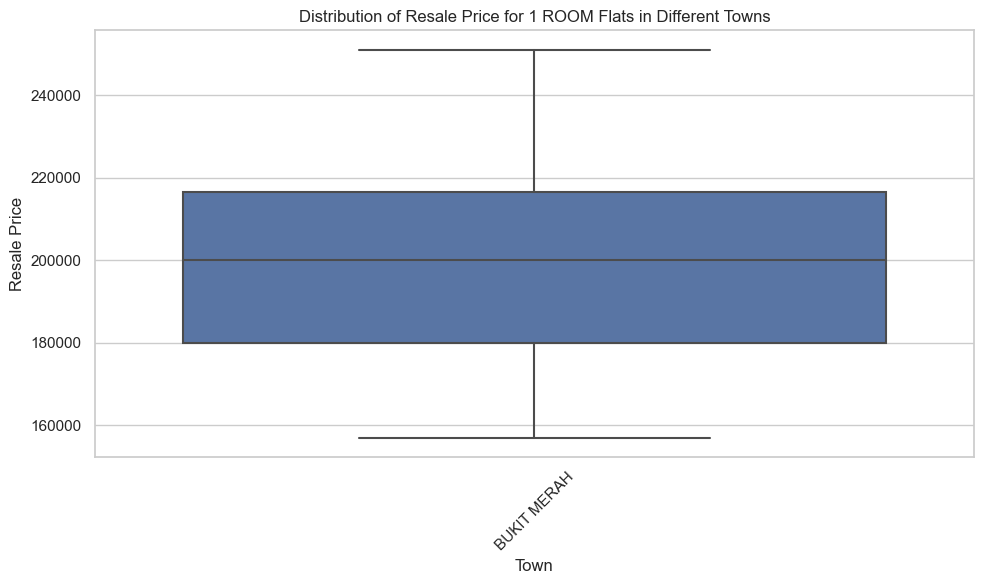

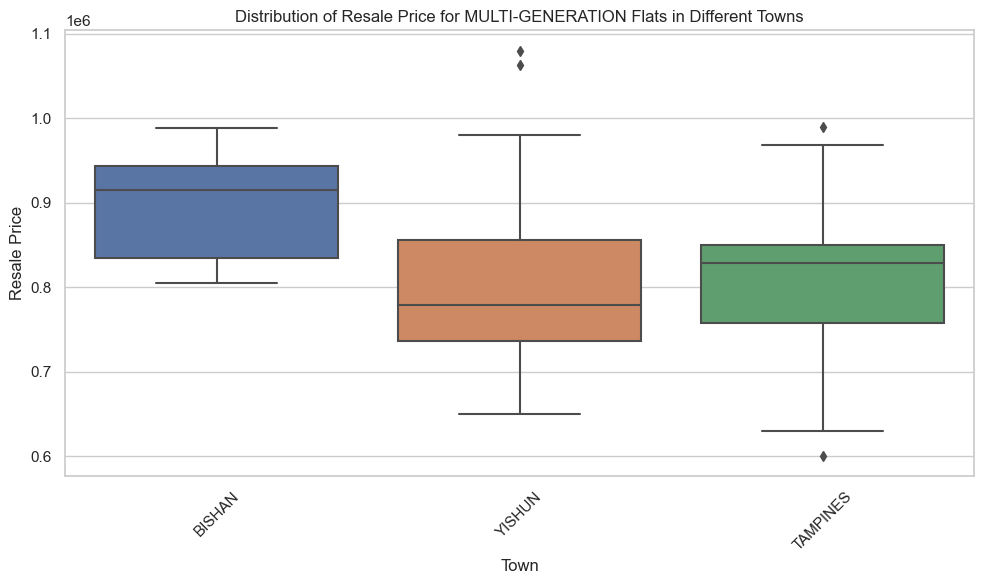

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the data
flat_types = df['flat_type'].unique()

for flat_type in flat_types:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='town', y='resale_price', data=df[df['flat_type'] == flat_type])
    plt.xlabel('Town')
    plt.ylabel('Resale Price')
    plt.title(f'Distribution of Resale Price for {flat_type} Flats in Different Towns')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


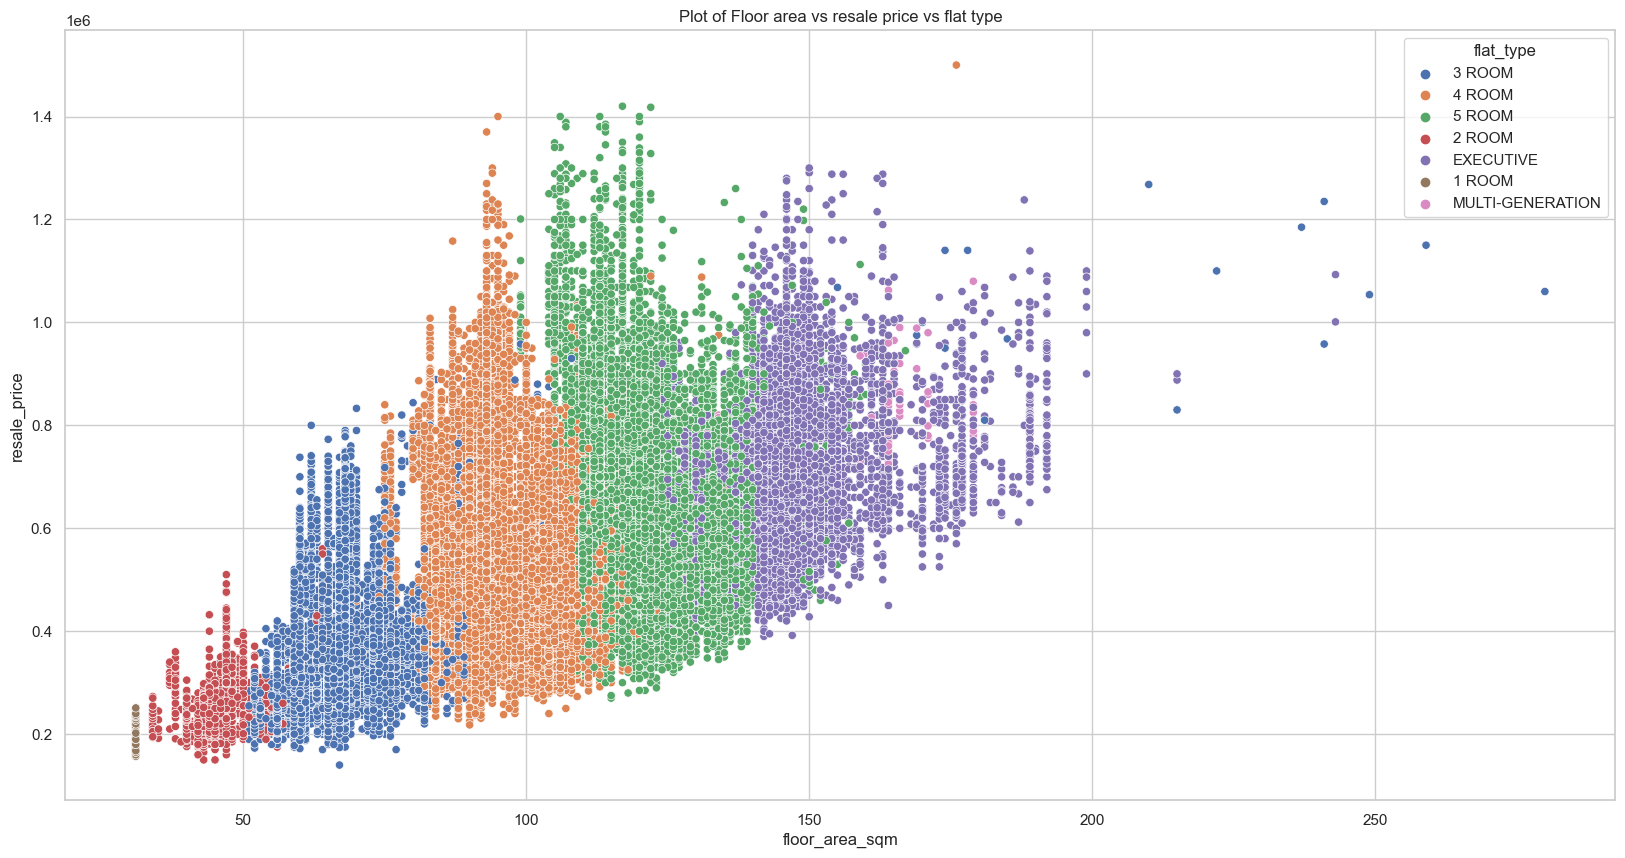

In [16]:
plt.figure(figsize=(20,10))
plt.title('Plot of Floor area vs resale price vs flat type')
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='flat_type');

# Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)
You may train and validate your models in Integrated Development Environment (IDE)
or Jupiter Notebook either on your local machine or on the cloud. You are required to
use PyCaret to develop a machine-learning pipeline and train your models.
1. The training environment should be initialised with some additional
preprocessing tasks such as scaling and normalisation, automatic feature
engineering and binning continuous data into intervals etc based on your
modelling and dataset which subsequently creates a transformation pipeline.
2. Models are trained and evaluated according to multiple performance metrics
using k-fold cross-validation.
3. Analyse the performance of a trained model on the test set using the
plot_model or evaluate_model function.
4. Use the final model to generate predictions on unseen data with
the predict_model function.
5. Save the entire pipeline
6. Enable experiment logging during the training of models.
7. Proper documentation is required for each step
8. Register the model with MLFlow

### Data cleaning and preparation
All experiments in PyCaret must be initialized using the setup function. It is responsible for all the data preparation tasks required before model training. Besides performing some basic default processing tasks, PyCaret also offers a wide array of pre-processing features. Click here to learn more about all the preprocessing functionalities in PyCaret.

In [17]:
columns_to_remove =['block', 'street_name', 'postal_code', 'month', 'latitude', 'longitude', 'cbd_dist', 'min_dist_mrt']

# Remove the specified columns from the DataFrame
df = df.drop(columns=columns_to_remove)

In [18]:
df.shape

(193877, 7)

In [19]:
from pycaret.regression import *

s = setup(df, target = 'resale_price', 
          transform_target = True, 
          log_experiment = True, 
          experiment_name = 'hdb flat'
)

2023/08/20 22:18:45 INFO mlflow.tracking.fluent: Experiment with name 'hdb flat' does not exist. Creating a new experiment.


- This code initializes the setup for a regression analysis using the PyCaret library.
- The first line imports the necessary functions from the PyCaret regression module.
- The second line sets up the data for analysis by specifying the target variable as 'Price' and transforming the target variable using a logarithmic function.
- The log_experiment parameter is set to True, which means that the experiment will be logged for future reference.
- The experiment_name parameter is set to 'diamond', which is the name of the experiment.
- The setup() function performs various preprocessing steps such as missing value imputation, feature engineering, and data normalization.
- It returns a trained model that can be used for prediction.

In [20]:
s.data.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price'],
      dtype='object')

In [21]:
s.data.dtypes

town                   category
flat_type              category
storey_range           category
floor_area_sqm          float32
flat_model             category
lease_commence_date       int32
resale_price            float32
dtype: object

In [22]:
s.get_config('dataset_transformed')

town  flat_type_4 ROOM  flat_type_5 ROOM  flat_type_3 ROOM  \
70258   4.283135               1.0               0.0               0.0   
153369  4.277320               1.0               0.0               0.0   
72796   4.267990               0.0               1.0               0.0   
9580    4.264850               0.0               0.0               1.0   
60546   4.267990               1.0               0.0               0.0   
...          ...               ...               ...               ...   
104275  4.291409               1.0               0.0               0.0   
110847  4.264850               1.0               0.0               0.0   
150120  4.267990               1.0               0.0               0.0   
118116  4.267888               1.0               0.0               0.0   
98770   4.270757               1.0               0.0               0.0   

        flat_type_2 ROOM  flat_type_EXECUTIVE  flat_type_MULTI-GENERATION  \
70258                0.0                  0.0                         0.0   
153369               0.0                  0.0                         0.0   
72796                0.0                  0.0                         0.0   
9580                 0.0                  0.0                         0.0   
60546                0.0                  0.0                         0.0   
...                  ...                  ...                         ...   
104275               0.0                  0.0                         0.0   
110847               0.0                  0.0                         0.0   
150120               0.0                  0.0                         0.0   
118116               0.0                  0.0                         0.0   
98770                0.0                  0.0                         0.0   

        flat_type_1 ROOM  storey_range_13 TO 15  storey_range_07 TO 09  ...  \
70258                0.0                    1.0                    0.0  ...   
153369               0.0                    0.0                    1.0  ...   
72796                0.0                    0.0                    0.0  ...   
9580                 0.0                    0.0                    0.0  ...   
60546                0.0                    0.0                    0.0  ...   
...                  ...                    ...                    ...  ...   
104275               0.0                    0.0                    0.0  ...   
110847               0.0                    0.0                    0.0  ...   
150120               0.0                    0.0                    0.0  ...   
118116               0.0                    0.0                    0.0  ...   
98770                0.0                    0.0                    1.0  ...   

        flat_model_Model A-Maisonette  flat_model_Terrace  \
70258                             0.0                 0.0   
153369                            0.0                 0.0   
72796                             0.0                 0.0   
9580                              0.0                 0.0   
60546                             0.0                 0.0   
...                               ...                 ...   
104275                            0.0                 0.0   
110847                            0.0                 0.0   
150120                            0.0                 0.0   
118116                            0.0                 0.0   
98770                             0.0                 0.0   

        flat_model_Multi Generation  flat_model_Premium Apartment Loft  \
70258                           0.0                                0.0   
153369                          0.0                                0.0   
72796                           0.0                                0.0   
9580                            0.0                                0.0   
60546                           0.0                                0.0   
...                             ...                                ...  

In [23]:
# Step 2: Train and Validate Models
best_model = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [24]:
best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 3313,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

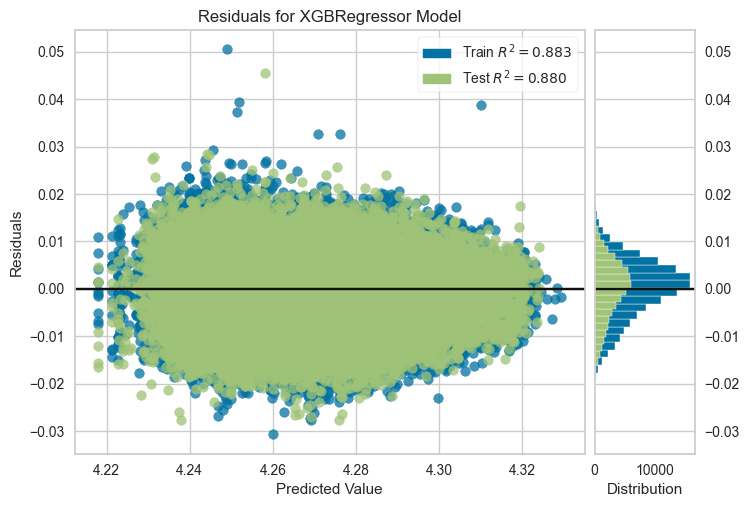

In [25]:
plot_model(best_model, plot = 'residuals')

In [26]:
data_unseen = df.copy()
data_unseen.drop('resale_price', axis = 1, inplace = True)
predictions = predict_model(best_model, data = data_unseen)


In [27]:
predictions.head()

town flat_type storey_range  floor_area_sqm      flat_model  \
0  ANG MO KIO    3 ROOM     07 TO 09            60.0        Improved   
1  ANG MO KIO    3 ROOM     01 TO 03            68.0  New Generation   
2  ANG MO KIO    3 ROOM     01 TO 03            69.0  New Generation   
3  ANG MO KIO    3 ROOM     01 TO 03            68.0  New Generation   
4  ANG MO KIO    3 ROOM     07 TO 09            68.0  New Generation   

   lease_commence_date  prediction_label  
0                 1986      282607.46875  
1                 1981      287685.53125  
2                 1980      288794.28125  
3                 1979      286943.03125  
4                 1980      305768.25000

In [28]:
from pycaret.regression import *
save_model(best_model, 'price_prediction_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\ulyss\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm',
                                              'lease_commence_date'],
                                     transformer=SimpleImputer())),
                 ('categorica...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_chi

In [29]:
# # load pipeline
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

In [30]:
pipeline = load_model("mlruns/1/5665d3f8f6e74146ae59908425cf241a/artifacts/model/model")

Transformation Pipeline and Model Successfully Loaded


In [31]:
print(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\ulyss\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['floor_area_sqm',
                                             'lease_commence_date'],
                                    transformer=SimpleImputer())),
                ('categorica...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None,